## dates & times with pandas

In [4]:
import pandas as pd
from datetime import datetime

#### pd.Timestamp

In [5]:
# to create pandas timestamp

time_stamp = pd.Timestamp(datetime(1981,8,11))
time_stamp

Timestamp('1981-08-11 00:00:00')

In [6]:
# also understands dates as string

pd.Timestamp(datetime(1981,8,11)) == pd.Timestamp("1981-8-11")

True

In [7]:
# attributes to get time-specific info

print(time_stamp.year)
print(time_stamp.weekday_name)

1981
Tuesday


C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  after removing the cwd from sys.path.


#### pd.Period & freq

It always has the frequency with "Month-end" as default.

In [8]:
period = pd.Period("2017-1")
period

Period('2017-01', 'M')

In [9]:
# convert to daily

period.asfreq("D")

Period('2017-01-31', 'D')

In [10]:
# convert to Timestampb

timestamp = period.to_timestamp()
timestamp

Timestamp('2017-01-01 00:00:00')

In [11]:
# covert back to period

period = timestamp.to_period("M")
period

Period('2017-01', 'M')

In [12]:
# basic date arithmetic

period +2

Period('2017-03', 'M')

In [13]:
pd.Timestamp("2017-01-31", "M") +1

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


Timestamp('2017-02-28 00:00:00', freq='M')

### Time Series:
#### Sequence of Dates & Times



In [14]:
# to create sequence of dates
# returns DatetimeIndex: sequence of Timestamp objects with frequency

index = pd.date_range(start="2017-1-1", periods= 12, freq = "M")
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
# Create the range of dates 
# default frequency is Day

seven_days =pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [16]:
index[2]

Timestamp('2017-03-31 00:00:00', freq='M')

In [17]:
# convert to PeriodIndex
# not mutate the original index

index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

### Creating Time Series:
#### setting DatetimeIndex as Index of DataFrame 

In [18]:
df = pd.DataFrame({"Dates":index})
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
Dates    12 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes
None


,Dates
0,2017-01-31
1,2017-02-28
2,2017-03-31
3,2017-04-30
4,2017-05-31
5,2017-06-30
6,2017-07-31
7,2017-08-31
8,2017-09-30
9,2017-10-31


In [19]:
# create ramdon numbers for 12 rows and 2 columns

import numpy as np

vals = np.random.random(size=(12,2))
df = pd.DataFrame(data=vals, index=index, columns=["A", "B"])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
A    12 non-null float64
B    12 non-null float64
dtypes: float64(2)
memory usage: 288.0 bytes
None


,A,B
2017-01-31,0.831945,0.026463
2017-02-28,0.364454,0.601007
2017-03-31,0.912138,0.484481
2017-04-30,0.515633,0.328609
2017-05-31,0.508612,0.211367
2017-06-30,0.729595,0.543789
2017-07-31,0.284289,0.048075
2017-08-31,0.001613,0.398340
2017-09-30,0.180473,0.906223
2017-10-31,0.471826,0.503754


### Time Series Transformation

In [20]:
google = pd.read_csv("Data/Google_Stock_Price_Train.csv")
print(google.info())
google.head()
# note that "Date" columns is type of object, it is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [21]:
# convert string dates to datetime

google["Date"] = pd.to_datetime(google["Date"])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null datetime64[ns]
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


In [22]:
# we can now set "Date" column as index
# then we can use entire dataframe as time series data 

google.set_index("Date", inplace=True)
print(google.info())
google.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB
None


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


* ploting time series data

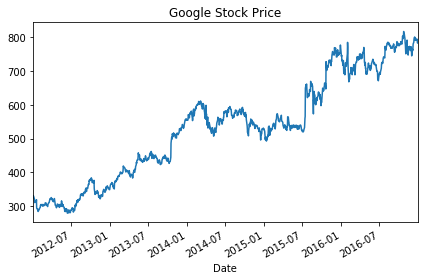

In [23]:
import matplotlib.pyplot as plt

google["Open"].plot(title = "Google Stock Price")
plt.tight_layout()
plt.show()

# It automatically creates reasonably spaced date labels for x axis!! 

### Partial String Indexing

In [24]:
# If you just pass a string representing a year,
# it returns all dates within this year
# Note that "2015" isn't a column name !!! 

google["2015"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null object
Volume    252 non-null object
dtypes: float64(3), object(2)
memory usage: 11.8+ KB


In [25]:
# we can also pass in a slice
# note that it includes the end date!!!

google["2015-5":"2016-10"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2015-05-01 to 2016-10-31
Data columns (total 5 columns):
Open      380 non-null float64
High      380 non-null float64
Low       380 non-null float64
Close     380 non-null object
Volume    380 non-null object
dtypes: float64(3), object(2)
memory usage: 17.8+ KB


In [26]:
# selecting a specific value

google.loc["2016-11-11", "Close"]

'754.02'

### Set Frequency

* It can be set with .asfreq() method

In [27]:
google.asfreq("D").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824 entries, 2012-01-03 to 2016-12-30
Freq: D
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 85.5+ KB


#### Upsampling

Set higher frequency, you will have missing data

In [28]:
google_upsample = google.asfreq("12H")
google_upsample.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03 00:00:00,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-04 12:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00,329.83,330.75,326.89,657.21,"6,590,300"


#### Downsampling

Set higher frequency, you will have missing data

In [29]:
# set frequency as "B" : bussiness days

google_downsample = google_upsample.asfreq("B")
print(google_downsample.info())
google_downsample.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2012-01-03 to 2016-12-30
Freq: B
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 61.1+ KB
None


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [30]:
# selecting missing data
# bussiness days buıt not trading days

google_downsample[google_downsample["Close"].isnull()].head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-16,NaN,NaN,NaN,NaN,NaN
2012-02-20,NaN,NaN,NaN,NaN,NaN
2012-04-06,NaN,NaN,NaN,NaN,NaN
2012-05-28,NaN,NaN,NaN,NaN,NaN
2012-07-04,NaN,NaN,NaN,NaN,NaN


### Compare annual stock price trends

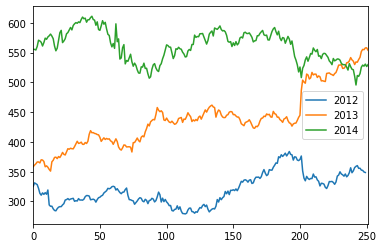

In [31]:
# Create dataframe prices here
prices =pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2012", "2013", "2014"]:
    price_per_year = google.loc[year, ["Open"]].reset_index(drop=True)
    price_per_year.rename(columns={"Open": year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices

prices.plot()
plt.show()

### Set and change time series frequency

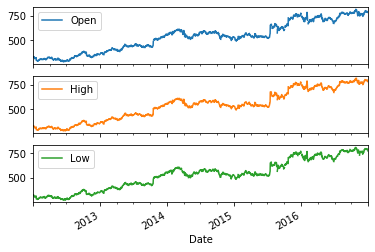

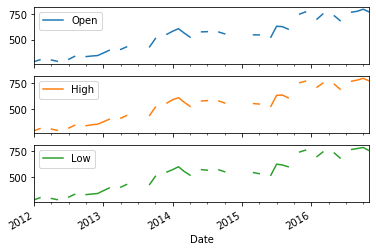

In [32]:
# Set the frequency to calendar daily
google = google.asfreq("D")

# Plot the data
google.plot(subplots=True)
plt.show()

# Set frequency to monthly
google = google.asfreq("M")

# Plot the data
google.plot(subplots=True)
plt.show()

### Parse date and DatetimeIndex while reading the data 

In [36]:
google = pd.read_csv("Data/Google_Stock_Price_Train.csv", parse_dates=["Date"], index_col="Date")
print(google.info())
google.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB
None


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


### Lags, changes, and returns for series

1) `.shift()`: Moving data between past and future

default: periods =1

In [50]:
# move all values in the "Open" column 1 period forward
# So, the first column is missing

google= google[["Open"]]
google["shifted"] = google["Open"].shift()
google.head()

,Open,shifted
Date,,
2012-01-03,325.25,NaN
2012-01-04,331.27,325.25
2012-01-05,329.83,331.27
2012-01-06,328.34,329.83
2012-01-09,322.04,328.34


In [51]:
# move all values in the "Open" column 1 period backward with period=-1
# So, the last column is missing

google["lagged"] = google["Open"].shift(periods=-1)
google

,Open,shifted,lagged
Date,,,
2012-01-03,325.25,NaN,331.27
2012-01-04,331.27,325.25,329.83
2012-01-05,329.83,331.27,328.34
2012-01-06,328.34,329.83,322.04
2012-01-09,322.04,328.34,313.70
...,...,...,...
2016-12-23,790.90,792.36,790.68
2016-12-27,790.68,790.90,793.70
2016-12-28,793.70,790.68,783.33


In [54]:
# we can calculate one-period change with dividing "Open" column to "shifted" method

google["change"] = google["Open"].div(google["shifted"])
google[["Open","change"]]

,Open,change
Date,,
2012-01-03,325.25,NaN
2012-01-04,331.27,1.018509
2012-01-05,329.83,0.995653
2012-01-06,328.34,0.995483
2012-01-09,322.04,0.980813
...,...,...
2016-12-23,790.90,0.998157
2016-12-27,790.68,0.999722
2016-12-28,793.70,1.003819


In [57]:
# we can also calculate the change as percentage 

google["return"] = google["change"].sub(1).mul(100)
google[["Open", "change", "return"]]

,Open,change,return
Date,,,
2012-01-03,325.25,NaN,NaN
2012-01-04,331.27,1.018509,1.850884
2012-01-05,329.83,0.995653,-0.434691
2012-01-06,328.34,0.995483,-0.451748
2012-01-09,322.04,0.980813,-1.918743
...,...,...,...
2016-12-23,790.90,0.998157,-0.184260
2016-12-27,790.68,0.999722,-0.027816
2016-12-28,793.70,1.003819,0.381950


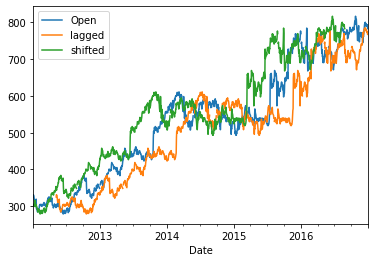

In [65]:
# Set data frequency to business daily
google = google.asfreq("B")

# Create 'lagged' and 'shifted' 90 bussiness days
google['lagged'] = google["Open"].shift(periods=90)
google['shifted'] = google["Open"].shift(periods=-90)

# Plot the google price series
google[["Open", "lagged", "shifted"]].plot()
plt.show()

2) `.diff()` & `pct_change()`: calculate the changes in different periods of time

In [60]:
google = google[["Open"]].copy()
google["diff"]= google["Open"].diff()
google

,Open,diff
Date,,
2012-01-03,325.25,NaN
2012-01-04,331.27,6.02
2012-01-05,329.83,-1.44
2012-01-06,328.34,-1.49
2012-01-09,322.04,-6.30
...,...,...
2016-12-23,790.90,-1.46
2016-12-27,790.68,-0.22
2016-12-28,793.70,3.02


In [61]:
google["pct_change"] = google["Open"].pct_change().mul(100)
google

,Open,diff,pct_change
Date,,,
2012-01-03,325.25,NaN,NaN
2012-01-04,331.27,6.02,1.850884
2012-01-05,329.83,-1.44,-0.434691
2012-01-06,328.34,-1.49,-0.451748
2012-01-09,322.04,-6.30,-1.918743
...,...,...,...
2016-12-23,790.90,-1.46,-0.184260
2016-12-27,790.68,-0.22,-0.027816
2016-12-28,793.70,3.02,0.381950


In [62]:
# we can also calculate multi-period returns

google["return_3day"] = google["Open"].pct_change(3).mul(100)
google

,Open,diff,pct_change,return_3day
Date,,,,
2012-01-03,325.25,NaN,NaN,NaN
2012-01-04,331.27,6.02,1.850884,NaN
2012-01-05,329.83,-1.44,-0.434691,NaN
2012-01-06,328.34,-1.49,-0.451748,0.950038
2012-01-09,322.04,-6.30,-1.918743,-2.786247
...,...,...,...,...
2016-12-23,790.90,-1.46,-0.184260,-0.735479
2016-12-27,790.68,-0.22,-0.027816,-0.648372
2016-12-28,793.70,3.02,0.381950,0.169115


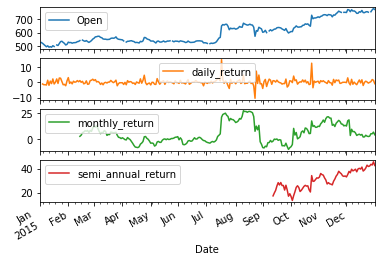

In [70]:
# Create daily_return
google['daily_return'] = google.loc["2015", "Open"].pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.loc["2015", "Open"].pct_change(30).mul(100)

# Create annual_return
google['semi_annual_return'] = google.loc["2015", "Open"].pct_change(180).mul(100)

# Plot the result
google.loc["2015", ["Open", 'daily_return','monthly_return', 'semi_annual_return']].plot(subplots=True)
plt.show()

### Compare the performance of several asset classes

You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

- Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index, then assign the result to prices.
- Select the first price for each series using .iloc[0] on prices and assign the result to first_prices.
- Divide prices by first_prices, multiply by 100 and assign the result to normalized.
- Plot normalized.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


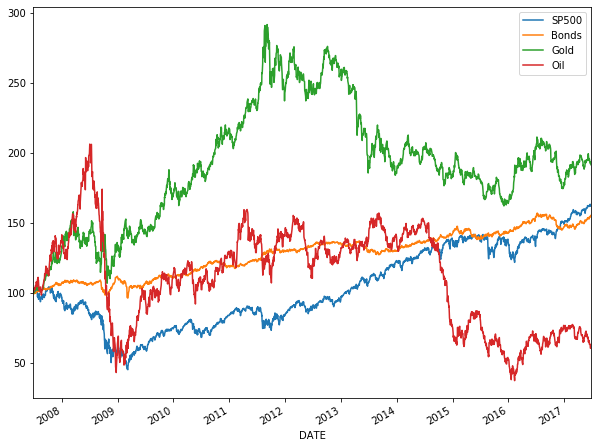

In [8]:
# Import data here
prices = pd.read_csv("Data/asset_classes.csv", parse_dates=["DATE"], index_col="DATE")

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

### Comparing stock prices with a benchmark
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

Company	Stock Ticker
Johnson & Johnson	JNJ
Exxon Mobil	XOM
JP Morgan Chase	JPM

- Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and dow_jones, respectively.
- Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. Inspect the .info() of data.
- Divide data by the first value for each series, multiply by 100 and plot the result.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


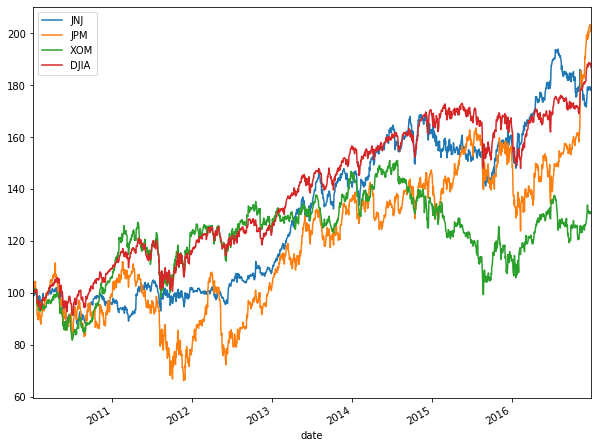

               JNJ    JPM    XOM      DJIA
date                                      
2010-01-04   64.68  42.85  69.15  10583.96
2010-01-05   63.93  43.68  69.42  10572.02
2010-01-06   64.45  43.92  70.02  10573.68
2010-01-07   63.99  44.79  69.80  10606.86
2010-01-08   64.21  44.68  69.52  10618.19
...            ...    ...    ...       ...
2016-12-23  115.96  87.05  90.71  19933.81
2016-12-27  115.91  87.13  90.75  19945.04
2016-12-28  115.10  86.50  90.30  19833.68
2016-12-29  115.49  85.89  90.35  19819.78
2016-12-30  115.21  86.29  90.26  19762.60

[1762 rows x 4 columns]


In [14]:
# Import stock prices and index here
stocks = pd.read_csv('Data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('Data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

print(data)

### Plot performance difference vs benchmark index

In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

- Create the list tickers containing the two stock symbols.
- Use pd.read_csv() to import 'msft_aapl.csv' and 'sp500.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and sp500, respectively.
- Use pd.concat() to concatenate stocks and sp500 along axis=1, apply .dropna() to drop all missing values, and assign the result to data.
- Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized.
- Select tickers from normalized, and subtract normalized['SP500'] with keyword axis=0 to align the indexes, then plot the result.

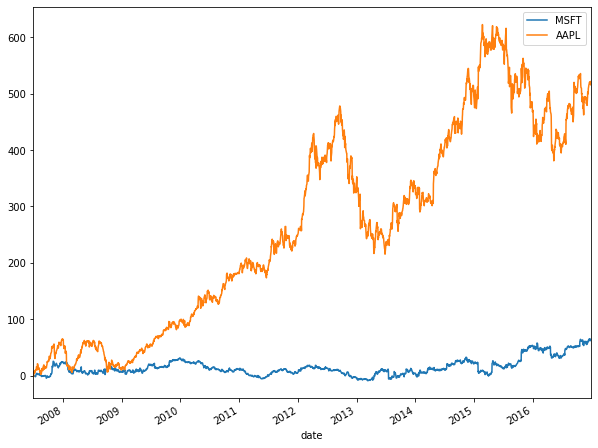

In [23]:
# Create tickers
tickers = ["MSFT", "AAPL"]

# Import stock data here
stocks = pd.read_csv('Data/msft_aapl.csv', parse_dates=["date"], index_col='date') 

# Import index here
sp500 = pd.read_csv('Data/sp500.csv', parse_dates=["date"], index_col='date') 

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result

normalized[tickers].sub(normalized.SP500, axis=0).plot()
plt.show()

*  Now you can compare these stocks to the overall market so you can more easily spot trends and outliers.

In [17]:
df =pd.read_csv("https://raw.githubusercontent.com/ksatola/Data-Science-Notes/master/data/dc27/sp500.csv")

In [18]:
df.to_csv("Data/sp500.csv", index=False)